# Cricketer Prediction

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping

# Model 1: PCA

* Here we are divide each image of into the size of (100,100).
* We treat each image as gray image.
* For simplicity, we convert these images into a single dimension of (10000) features and apply PCA.

## Loading Dataset

In [2]:
fldr = 'Cricketers_Images/Cricket_Legends/Cricket_Legends'

In [3]:
X = []
y = []
cricketer_id = 0
cricketer_names = []
for cricketer in os.listdir(fldr):
    cricketer_path = fldr+'/'+cricketer
    cricketer_names.append(cricketer)
    for cricketer_image in os.listdir(cricketer_path):
        image_path = cricketer_path+'/'+cricketer_image
        img = cv2.imread(image_path)
        gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        resized_img = cv2.resize(gray_img,(100,100))
        v= resized_img.flatten()
        X.append(v)
        y.append(cricketer_id)
    cricketer_id+=1
X = np.array(X)
y = np.array(y)
print('Total No of Images : ',X.shape[0])
print('No of Distinct Classes : ',len(cricketer_names))

Total No of Images :  6948
No of Distinct Classes :  31


In [4]:
X.shape

(6948, 10000)

In [5]:
y.shape

(6948,)

In [6]:
y

array([ 1,  1,  1, ..., 30, 30, 30])

In [7]:
y = y-1

In [8]:
y

array([ 0,  0,  0, ..., 29, 29, 29])

In [9]:
del cricketer_names[0]

In [10]:
M = []
for row in X.T:
    M.append(row.mean())
M = np.array(M)
M.shape

(10000,)

In [11]:
X = X-M

In [42]:
p, mn = X.shape

In [43]:
CVpp = np.zeros((p,p))

In [44]:
CVpp.shape

(6948, 6948)

In [45]:
for i in range(p):
    for j in range(p):
        CVpp[i][j] = (X[i]*X[j]).sum()

In [47]:
eigen_values = np.linalg.eig(CVpp)

In [70]:
eigenvalues = np.array(eigen_values[0])

In [72]:
cum = np.cumsum(eigenvalues)

C:\Users\hp\OneDrive\Documents\MLKernal\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\hp\OneDrive\Documents\MLKernal\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


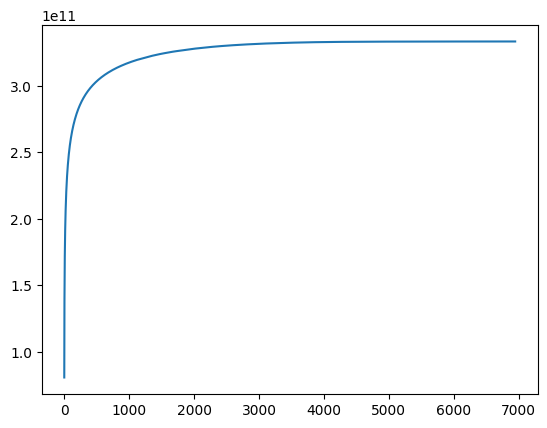

In [73]:
plt.plot(range(len(cum)),cum)

In [75]:
tot = cum[-1]
percentage = 95
for i in range(len(cum)):
    if cum[i]>percentage*tot/100:
        print('First {} components has more than {} percetage'.format(i,percentage))
        break

First 956 components has more than 95 percetage


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [76]:
n_comps = 956

In [77]:
pca = PCA(n_components = n_comps,svd_solver = 'randomized',whiten = True).fit(X_train)

In [78]:
def plot_gallery(images,titles,h,w,n_row = 3,n_col = 5):
    plt.figure(figsize = (1.8*n_col,2.4*n_row))
    plt.subplots_adjust(bottom = 0,left = 0.01,right = .99,top = .90,hspace = .35)
    for i in range(n_row*n_col):
        plt.subplot(n_row,n_col,i+1)
        plt.imshow(images[i].reshape((h,w)),cmap = plt.cm.gray)
        plt.title(titles[i],size = 12)
        plt.xticks(())
        plt.yticks(())

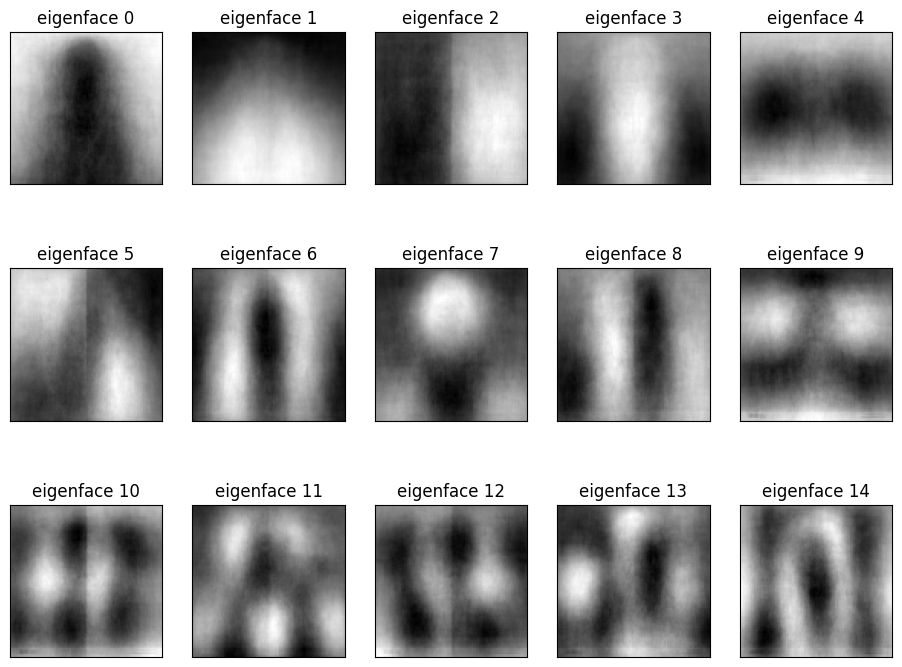

In [79]:
eigenfaces = pca.components_.reshape((n_comps,100,100))
eigenface_titles = ['eigenface %d' %i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces,eigenface_titles,100,100)

plt.show()

In [80]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Train Shape = ",X_train_pca.shape)
print("Test Shape = ",X_test_pca.shape)

Train Shape =  (5211, 956)
Test Shape =  (1737, 956)


In [81]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_pca,y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)

In [82]:
clf = MLPClassifier(random_state = 1,hidden_layer_sizes = (10,10),max_iter = 1000,verbose = True).fit(X_train_lda,y_train)

Iteration 1, loss = 3.59161141
Iteration 2, loss = 3.47581386
Iteration 3, loss = 3.39991328
Iteration 4, loss = 3.33620634
Iteration 5, loss = 3.27424853
Iteration 6, loss = 3.20557151
Iteration 7, loss = 3.12955531
Iteration 8, loss = 3.04732806
Iteration 9, loss = 2.96270099
Iteration 10, loss = 2.87806933
Iteration 11, loss = 2.79737424
Iteration 12, loss = 2.71752027
Iteration 13, loss = 2.64351951
Iteration 14, loss = 2.57709872
Iteration 15, loss = 2.51662037
Iteration 16, loss = 2.46273604
Iteration 17, loss = 2.41569284
Iteration 18, loss = 2.37518255
Iteration 19, loss = 2.34005590
Iteration 20, loss = 2.30659207
Iteration 21, loss = 2.27764944
Iteration 22, loss = 2.25325092
Iteration 23, loss = 2.23103090
Iteration 24, loss = 2.21142871
Iteration 25, loss = 2.19267317
Iteration 26, loss = 2.17643732
Iteration 27, loss = 2.16247876
Iteration 28, loss = 2.14916439
Iteration 29, loss = 2.13684829
Iteration 30, loss = 2.12758644
Iteration 31, loss = 2.11818615
Iteration 32, los

In [83]:
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

[(29, 10), (10, 10), (10, 30)]


Accuracy =  19.57397812320092


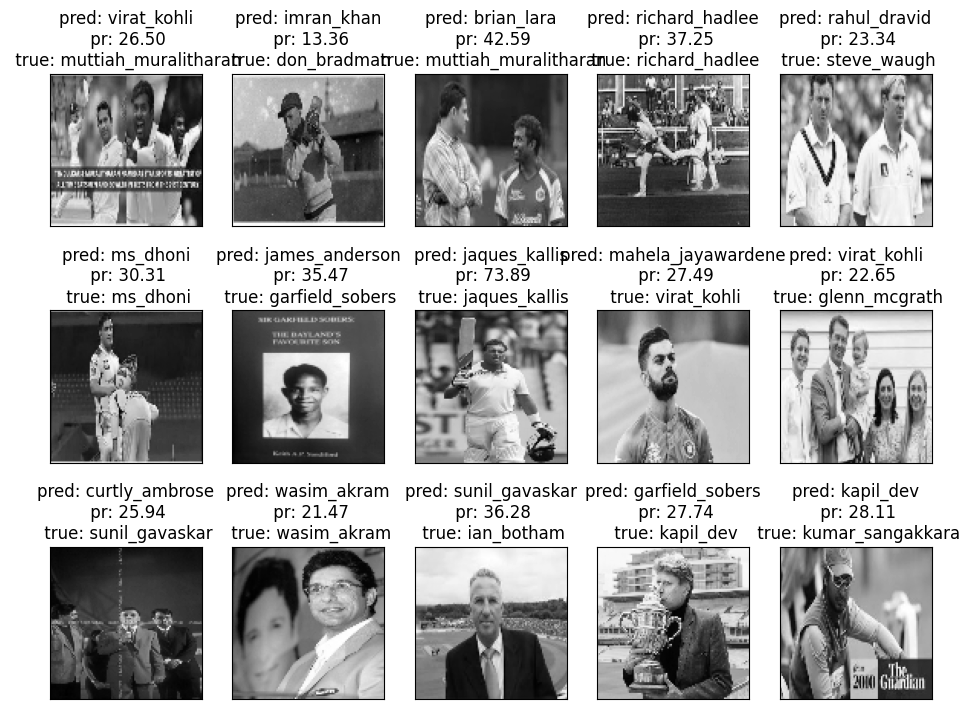

In [84]:
y_pred = []
y_prob = []
for test_face in X_test_lda:
    pred_id = clf.predict([test_face])[0]
    pred_prob = clf.predict_proba([test_face]).max()
    y_pred.append(pred_id)
    y_prob.append(pred_prob)

y_pred = np.array(y_pred)

prediction_titles = []
true_positive = 0
for i in range(y_pred.shape[0]):
    true_name = cricketer_names[y_test[i]]
    pred_name = cricketer_names[y_pred[i]]
    result = 'pred: %s\n pr: %s\n true: %s' % (pred_name,str(y_prob[i]*100)[0:5],true_name)
    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive+=1
print('Accuracy = ',true_positive*100/(y_pred.shape[0]))
plot_gallery(X_test,prediction_titles,100,100)
plt.show()

## Using VGGNET

In [85]:
fldr = 'Cricketers_Images/Cricket_Legends/Cricket_Legends'

In [86]:
X = []
y = []
cricketer_id = 0
cricketer_names = []
for cricketer in os.listdir(fldr):
    cricketer_path = fldr+'/'+cricketer
    cricketer_names.append(cricketer)
    for cricketer_image in os.listdir(cricketer_path):
        image_path = cricketer_path+'/'+cricketer_image
        img = cv2.imread(image_path)
        rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(rgb_img,(64,64))
        X.append(resized_img)
        y.append(cricketer_id)
    cricketer_id+=1
X = np.array(X)
y = np.array(y)
print('Total No of Images : ',X.shape[0])
print('No of Distinct Classes : ',len(cricketer_names))

Total No of Images :  6948
No of Distinct Classes :  31


In [87]:
X.shape

(6948, 64, 64, 3)

In [88]:
y.shape

(6948,)

In [89]:
y = y-1
y

array([ 0,  0,  0, ..., 29, 29, 29])

In [90]:
del cricketer_names[0]

In [91]:
cricketer_names

['adam_gilchrist',
 'alastair_cook',
 'allan_donald',
 'brian_lara',
 'chris_gayle',
 'curtly_ambrose',
 'dale_steyn',
 'don_bradman',
 'garfield_sobers',
 'glenn_mcgrath',
 'ian_botham',
 'imran_khan',
 'james_anderson',
 'jaques_kallis',
 'kapil_dev',
 'kumar_sangakkara',
 'mahela_jayawardene',
 'ms_dhoni',
 'muttiah_muralitharan',
 'rahul_dravid',
 'richard_hadlee',
 'ricky_ponting',
 'sachin_tendulkar',
 'shane_warne',
 'shoaib_akhtar',
 'steve_waugh',
 'sunil_gavaskar',
 'virat_kohli',
 'viv_richards',
 'wasim_akram']

In [92]:
cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

array([[[ 24,  13,   9],
        [ 26,  16,  14],
        [ 29,  21,  19],
        ...,
        [251, 255, 254],
        [251, 255, 254],
        [251, 255, 254]],

       [[ 25,  14,  10],
        [ 26,  16,  14],
        [ 29,  20,  21],
        ...,
        [251, 255, 254],
        [251, 255, 254],
        [251, 255, 254]],

       [[ 24,  14,  12],
        [ 25,  17,  14],
        [ 26,  20,  20],
        ...,
        [251, 255, 254],
        [251, 255, 254],
        [251, 255, 254]],

       ...,

       [[ 38,  55,  99],
        [ 41,  58, 102],
        [ 44,  61, 105],
        ...,
        [187, 174, 121],
        [187, 174, 121],
        [185, 172, 119]],

       [[ 24,  41,  85],
        [ 26,  43,  87],
        [ 31,  48,  92],
        ...,
        [181, 168, 116],
        [182, 169, 117],
        [183, 170, 118]],

       [[  7,  24,  68],
        [ 10,  27,  71],
        [ 15,  32,  76],
        ...,
        [172, 159, 107],
        [175, 162, 110],
        [178, 165, 113]]

virat_kohli


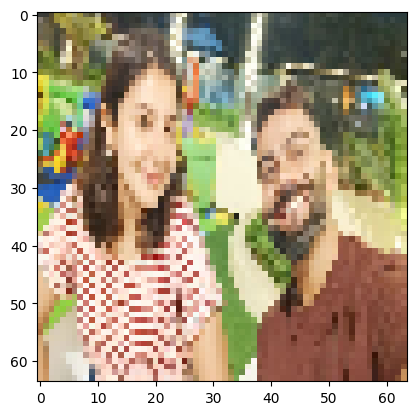

In [108]:
idx = random.randint(0,X.shape[0])
plt.imshow(X[idx])
print(cricketer_names[y[idx]])

### Normalization and Standardization

In [109]:
X_norm = X/255.0
mean = np.mean(X_norm)
std = np.std(X_norm)
X_std = (X_norm - mean)/std

In [110]:
X_std.shape

(6948, 64, 64, 3)

In [111]:
base_model = VGG16(weights = 'imagenet',include_top = False,input_shape = (64,64,3))

In [112]:
feat = base_model.predict(X_std)

218/218 ━━━━━━━━━━━━━━━━━━━━ 109s 499ms/step


In [113]:
feat.shape

(6948, 2, 2, 512)

In [114]:
X_train,X_test,y_train,y_test = train_test_split(feat,y,test_size = 0.20,random_state = 42)

In [115]:
y_train.shape

(5558,)

In [116]:
model = Sequential([
    Flatten(input_shape = (2,2,512)),
    Dense(3000,activation = 'relu'),
    Dense(1000,activation = 'relu'),
    Dense(500,activation = 'relu'),
    Dense(30,activation = 'softmax')
])

C:\Users\hp\OneDrive\Documents\MLKernal\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [117]:
model.compile(optimizer = 'Adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [118]:
es = EarlyStopping(monitor = 'val_loss',mode = 'min',patience = 50,restore_best_weights = True)
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),callbacks = [es],epochs = 10,verbose = 1)

Epoch 1/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 24s 130ms/step - accuracy: 0.0805 - loss: 3.3811 - val_accuracy: 0.1676 - val_loss: 2.8494
Epoch 2/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - accuracy: 0.2888 - loss: 2.4974 - val_accuracy: 0.3259 - val_loss: 2.4388
Epoch 3/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.5690 - loss: 1.5347 - val_accuracy: 0.4237 - val_loss: 2.1538
Epoch 4/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.7745 - loss: 0.7762 - val_accuracy: 0.5468 - val_loss: 1.9963
Epoch 5/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 23s 130ms/step - accuracy: 0.8860 - loss: 0.3964 - val_accuracy: 0.6288 - val_loss: 2.0664
Epoch 6/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 128ms/step - accuracy: 0.9439 - loss: 0.2106 - val_accuracy: 0.6173 - val_loss: 2.1646
Epoch 7/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9626 - loss: 0.1324 - val_accuracy: 0.6525 - val_loss: 2.0824
Epoch 8/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 22s 129ms/step - accuracy: 0.9715 - loss: 0

In [119]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5527 - loss: 1.9991


[1.9963363409042358, 0.5467625856399536]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Actual :  virat_kohli 

Predicted :  virat_kohli 
Probability :  86.78


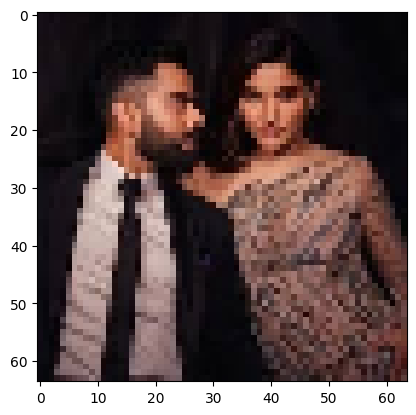

In [123]:
def predict(idx):
    plt.imshow(X[idx])
    t = np.expand_dims(feat[idx],axis = 0)
    pred = model.predict(t)
    name_id = pred[0].argmax()
    prob = round(pred[0][name_id]*100,2)
    print('Actual : ',cricketer_names[y[idx]],'\n')
    print('Predicted : ',cricketer_names[name_id],'\nProbability : ',prob)
idx = random.randint(0,6948)
predict(idx)

In [212]:
# Prediction for new image
def prediction(img_path):
    img = cv2.imread(img_path)
    rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(rgb_img,(64,64))
    plt.imshow(resized_img)
    t = resized_img/255.0
    t = (t-mean)/std
    t = np.expand_dims(t,axis = 0)
    vgg_img = base_model.predict(t)
    pred = model.predict(vgg_img)
    name_id = pred[0].argmax()
    prob = round(pred[0][name_id]*100,2)
    print('Predicted : ',cricketer_names[name_id],'\nProbability : ',prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted :  imran_khan 
Probability :  27.15


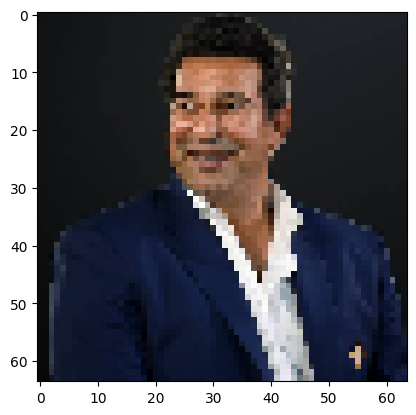

In [218]:
img_path = 'wasim_akram2.jpeg'
prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted :  virat_kohli 
Probability :  55.09


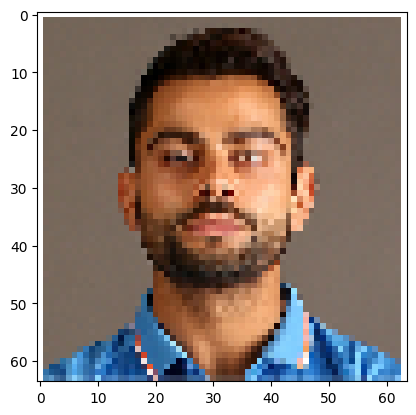

In [214]:
img_path = 'virat2.png'
prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted :  dale_steyn 
Probability :  64.21


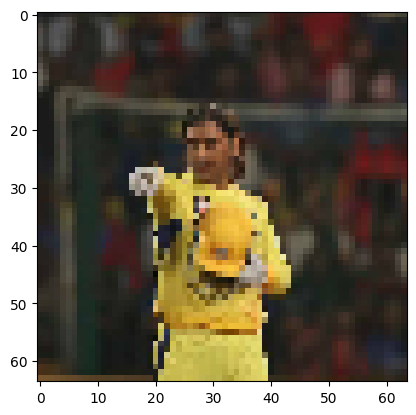

In [215]:
img_path = 'dhoni1.jpeg'
prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted :  brian_lara 
Probability :  99.89


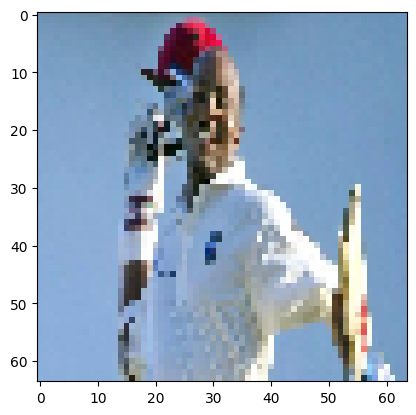

In [216]:
img_path = 'brainlara1.jpg'
prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted :  brian_lara 
Probability :  97.46


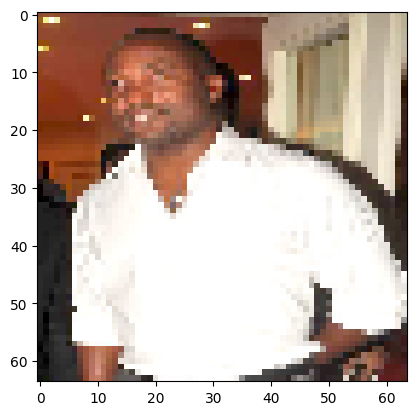

In [217]:
prediction('brainlara2.jpg')

## Buiding an CNN

In [131]:
X_norm = X/255.0
mean = np.mean(X_norm)
std = np.std(X_norm)
X_std = (X_norm - mean)/std

In [169]:
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size = 0.20,random_state = 42)

In [170]:
cnn =  Sequential([
    Conv2D(filters = 64, kernel_size = (3,3),activation = 'relu',input_shape = (64,64,3)),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(2000,activation = 'relu'),
    Dense(500,activation = 'relu'),
    
    
    Dense(30,activation = 'softmax')
])

In [171]:
cnn.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [172]:
es = EarlyStopping(monitor = 'val_loss',mode = 'min',patience = 50,restore_best_weights = True)

In [174]:
cnn.fit(X_train,y_train,validation_data = (X_test,y_test),callbacks = [es],epochs = 5,verbose = 1)

Epoch 1/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.9107 - loss: 0.4027 - val_accuracy: 0.6237 - val_loss: 2.0290
Epoch 2/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.9635 - loss: 0.1985 - val_accuracy: 0.6396 - val_loss: 2.2444
Epoch 3/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - accuracy: 0.9846 - loss: 0.1224 - val_accuracy: 0.6518 - val_loss: 2.4466
Epoch 4/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9909 - loss: 0.0569 - val_accuracy: 0.6446 - val_loss: 2.3263
Epoch 5/5
174/174 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.9885 - loss: 0.0658 - val_accuracy: 0.6475 - val_loss: 2.6531


In [175]:
cnn.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.6293 - loss: 2.0570


[2.0290064811706543, 0.6237410306930542]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Actual :  kumar_sangakkara 

Predicted :  kumar_sangakkara 
Probability :  87.52


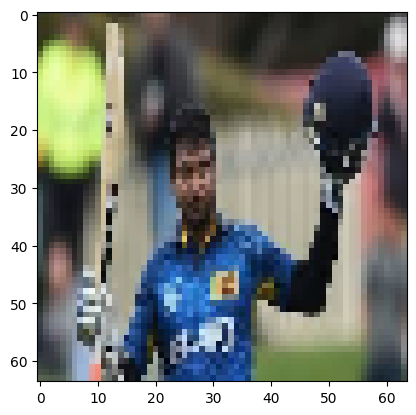

In [183]:
def predict(idx):
    plt.imshow(X[idx])
    t = np.expand_dims(X_std[idx],axis = 0)
    pred = cnn.predict(t)
    name_id = pred[0].argmax()
    prob = round(pred[0][name_id]*100,2)
    print('Actual : ',cricketer_names[y[idx]],'\n')
    print('Predicted : ',cricketer_names[name_id],'\nProbability : ',prob)
idx = random.randint(0,6948)
predict(idx)

In [221]:
# Prediction for new image
def prediction(img_path):
    img = cv2.imread(img_path)
    rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(rgb_img,(64,64))
    plt.imshow(resized_img)
    t = np.expand_dims(resized_img,axis =0)
    t = t/255.0
    t = (t - mean)/std
    pred = cnn.predict(t)
    name_id = pred[0].argmax()
    prob = round(pred[0][name_id]*100,2)
    print('Predicted : ',cricketer_names[name_id],'\nProbability : ',prob)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted :  adam_gilchrist 
Probability :  92.04


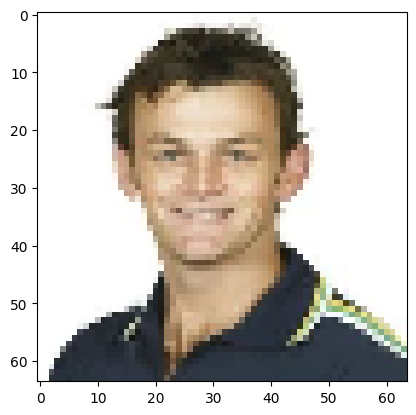

In [200]:
prediction('gilchrist2.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted :  brian_lara 
Probability :  97.16


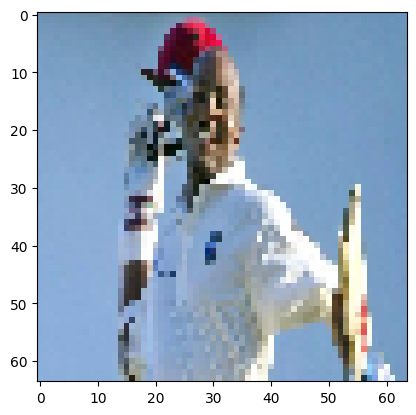

In [204]:
img_path = 'brainlara1.jpg'
prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Predicted :  allan_donald 
Probability :  34.4


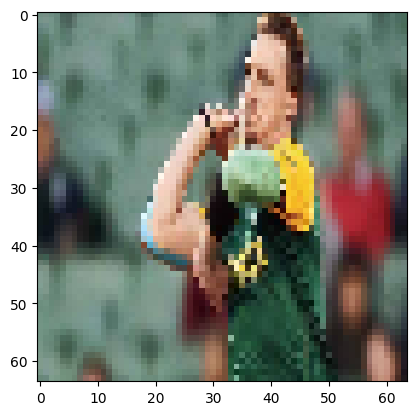

In [198]:
prediction('steyn1.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted :  shane_warne 
Probability :  61.86


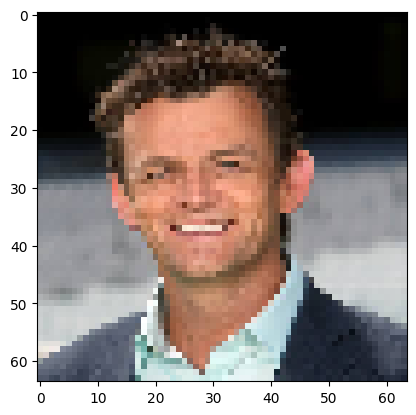

In [199]:
prediction('gilchrist1.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted :  allan_donald 
Probability :  63.4


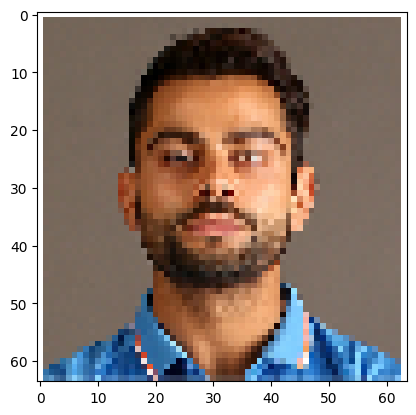

In [201]:
img_path = 'virat2.png'
prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted :  ms_dhoni 
Probability :  87.21


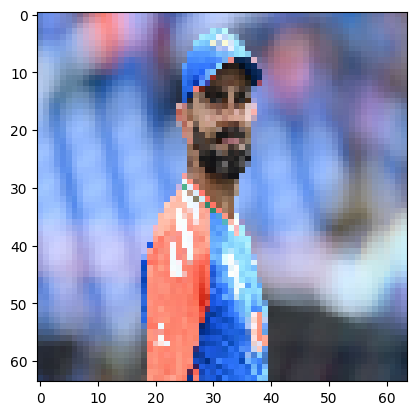

In [202]:
img_path = 'virat1.jpeg'
prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted :  adam_gilchrist 
Probability :  63.18


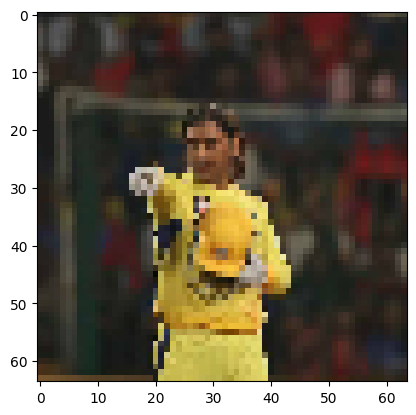

In [203]:
img_path = 'dhoni1.jpeg'
prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted :  brian_lara 
Probability :  96.86


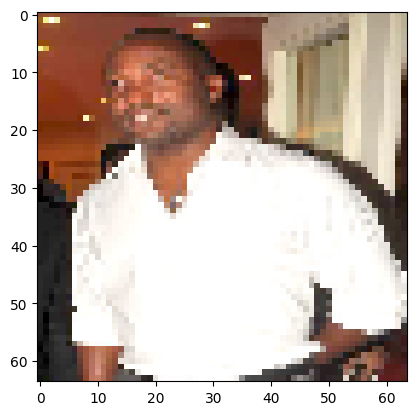

In [205]:
prediction('brainlara2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Predicted :  chris_gayle 
Probability :  45.32


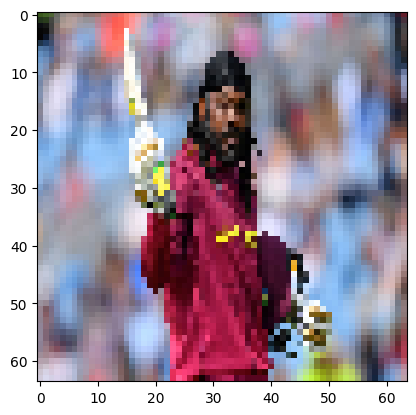

In [223]:
prediction('gayle1.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted :  adam_gilchrist 
Probability :  81.73


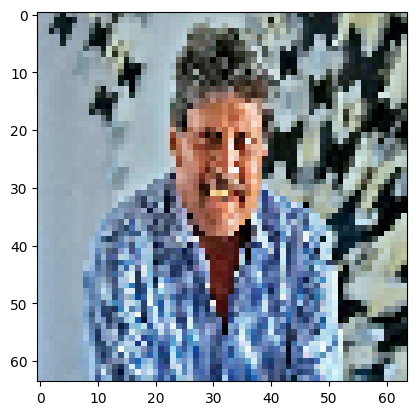

In [225]:
prediction('kapil_dev1.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Predicted :  adam_gilchrist 
Probability :  59.05


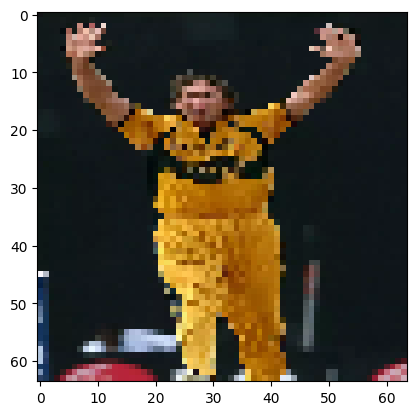

In [228]:
prediction('McGrath1.webp')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted :  wasim_akram 
Probability :  88.6


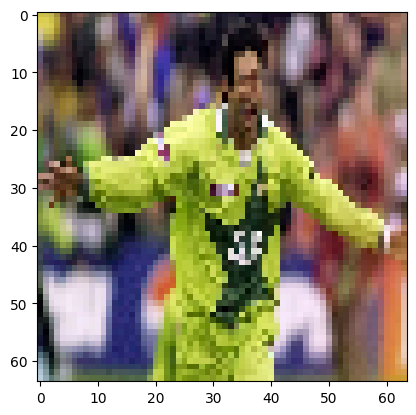

In [233]:
prediction('wasim_akram1.webp')